<a href="https://colab.research.google.com/github/johnitodo/Cardio-GoodFitness/blob/main/Who_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#We will begin by importing in all our libraries into our environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()



Saving who_data.csv to who_data (1).csv


In [10]:
#We import our dataset into the environment
df = pd.read_csv('who_data.csv')

In [11]:
#Getting 5 samples of our data 
df.sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
28197,40,Private,287008,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,Germany,>50K
13251,44,Self-emp-not-inc,57233,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
24319,44,Private,186916,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
27260,68,Private,191581,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,3273,0,40,United-States,<=50K
21812,82,?,194590,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,8,United-States,<=50K


We can see from the above that we have ? in workclass and in occupation.

In [12]:
#more in formation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

From the dataset, we can see that there are  32561 rows and 15 columns of data of data, also there are no missing values in the columns

**Checking columns with perceived problems**

from the dataset we can see that workclass column and occupation column both have ? present in them, we would take a closer look and see if we can make inferences to fill the missing data values.

In [13]:
#Checking for unique values of workclass 
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
#Checking the number of ? values
(df['workclass']==' ?').sum()

1836

As there are no information available to make informed inference from, we will drop the missing rows.

In [15]:
#dropping ? values for workclass
df.drop(df.loc[df['workclass']== ' ?'].index, inplace = True)

df.reset_index(drop = True, inplace = True) #resetting the row numbers in the dataset

In [16]:
#Checkig the number ? in the data set
(df['occupation']==' ?').sum()

7

In [17]:
#Checking our unique occupations
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [18]:
#Checking the rows with ?
df.loc[(df['occupation']== ' ?') ] 

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
5009,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10210,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
13933,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
19194,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
21932,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
30482,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
30491,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


from the affected rows, there are no information to use to make an informed inference on the columns.

In [19]:
#dropping ? values for occupation
df.drop(df.loc[df['occupation']== ' ?'].index, inplace = True)

df.reset_index(drop = True, inplace = True) #resetting the row numbers in the dataset

Checking the education row

In [20]:
df['education'].value_counts()

 HS-grad         9968
 Some-college    6775
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64

For simplicity, we will place all workers whose education level is below tertiary education to Pre-tertiary while those on associate level of education to Associate. This will enable us analyse our data properly.

In [21]:
# Define the values to be replaced
values_to_replace = [' 5th-6th', ' 12th', ' 4th-5th', ' 1st-4th', ' 10th', ' 11th', ' Preschool', ' 7th-8th', ' 10th', ' 11th', ' 9th']
values_to_replace1 = [' Assoc-acdm', ' Assoc-voc']

# Replace specified values with 'Elementary-School' in the 'education' column
df.loc[df['education'].isin(values_to_replace), 'education'] = 'Pre-Tertiary'
df.loc[df['education'].isin(values_to_replace1), 'education'] = 'Associate'


In [22]:
df['education'].unique()

array([' Bachelors', ' HS-grad', 'Pre-Tertiary', ' Masters',
       ' Some-college', 'Associate', ' Doctorate', ' Prof-school'],
      dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30718 non-null  int64 
 1   workclass               30718 non-null  object
 2   fnlwgt                  30718 non-null  int64 
 3   education               30718 non-null  object
 4   education_no_of_years   30718 non-null  int64 
 5   marital_status          30718 non-null  object
 6   occupation              30718 non-null  object
 7   relationship            30718 non-null  object
 8   race                    30718 non-null  object
 9   sex                     30718 non-null  object
 10  capital_gain            30718 non-null  int64 
 11  capital_loss            30718 non-null  int64 
 12  working_hours_per_week  30718 non-null  int64 
 13  native_country          30718 non-null  object
 14  salary                  30718 non-null  object
dtypes:

# **Visualisation of the data for informed insights**

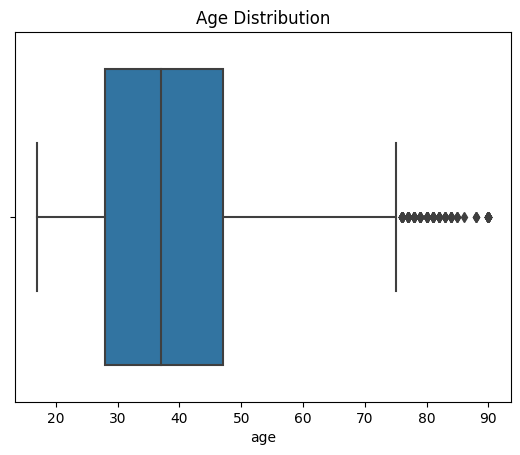

In [24]:
#Chexking age distribution
sns.boxplot(df, x = 'age')
plt.title('Age Distribution');

We can see that the bulk of our working population are between the ages of 26 and 48, we also have few members of the working populatio that are above 75 years.

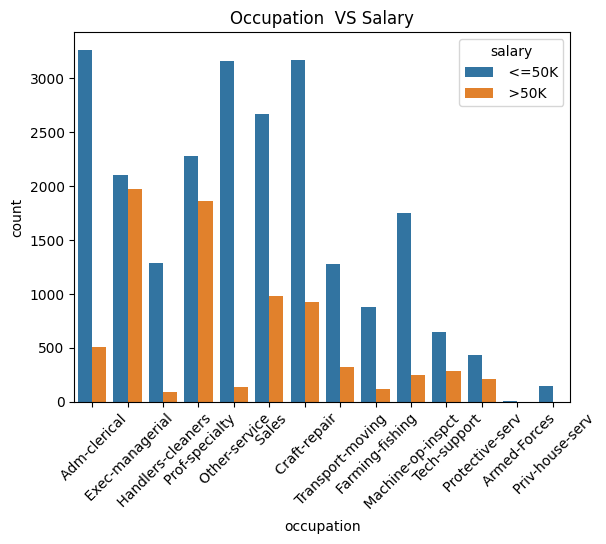

In [25]:
sns.countplot(df, x = 'occupation', hue = 'salary')
plt.xticks(rotation = 45)
plt.title('Occupation  VS Salary');

from the above plot, we can see that there are alot of people in our population who earn less 50k spread across all the various jobs. people who are in Executive Managerial role, professional specialty, sales, craft-repair, had more people who earned above 50k. This can be due to their area of specialty or their education.

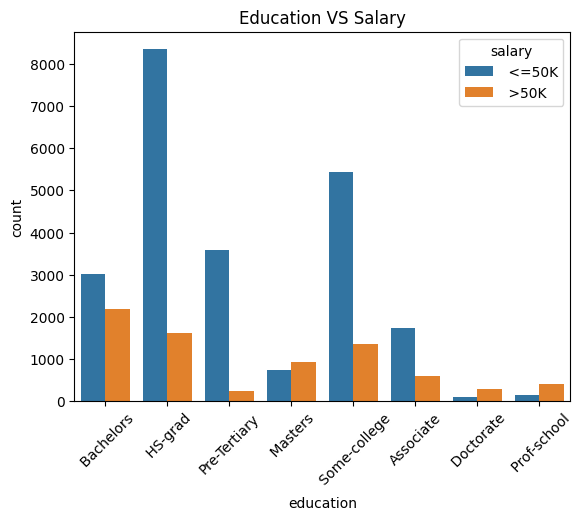

In [26]:
sns.countplot(df, x = 'education', hue = 'salary')
plt.xticks(rotation = 45)
plt.title('Education VS Salary');

From the above observation, we see that we have more people who earned above 50k to have either have their doctorate, masters or where in professional school. Also we have more people who have a bachelors degree,in some college or are high school graduates who earn above 50k. The members of the population who earned less than 50k are spread across the general population but where more present in high school graduates, in some college,bachelors and Associates. 

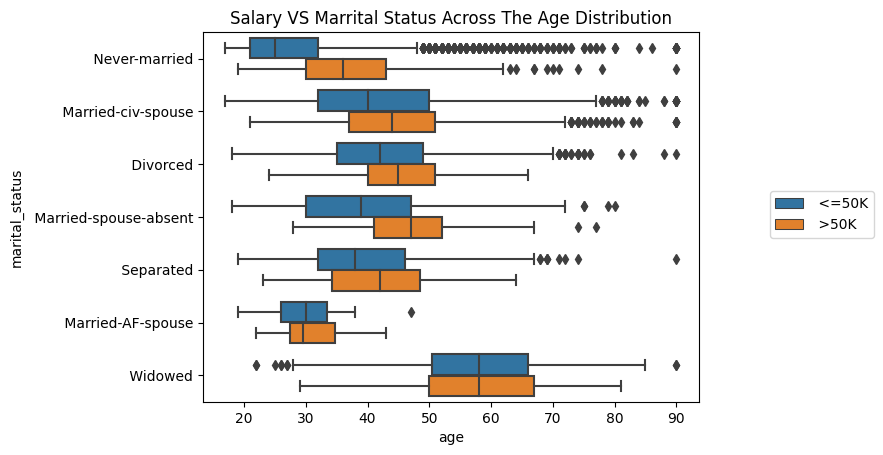

In [27]:
#Checking age distribution
sns.boxplot(df, x = 'age', y = 'marital_status', hue = 'salary');
#remove legend that appears in the plot
plt.legend().remove()
# Place the legend outside of the image
plt.figlegend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Salary VS Marrital Status Across The Age Distribution')

# Show the plot
plt.show()

We also went further to check the spread of our salary using the marital status across all ages. We observed that we had more spread of people who earned more than 50k where single and between the ages of 50 and 68 followed by those who were seperated and within the age of 35 and 49 years also with married-civ-spouse who were between the ages of 37 and 51. Conversely people who earned less than 50 where mostly mostly married-civ-spouse and married-spouse-absent. Also people who where never married where the youngest in this segmentation.

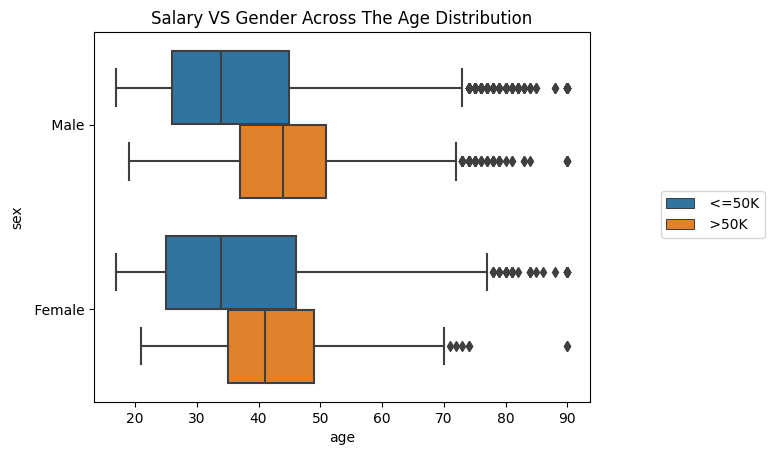

In [28]:
#Checking age distribution
sns.boxplot(df, x = 'age', y = 'sex', hue = 'salary')
#remove legend that appears in the plot
plt.legend().remove()
# Place the legend outside of the image
plt.figlegend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Salary VS Gender Across The Age Distribution')

# Show the plot
plt.show()

From this distribution we can see that we have more females who are in employment as against the male gender. We have more females who earn less than 50k and more male spread across all the age who earn over 50k as against the females. We can also see that women tend to earn more ealier on than the male.

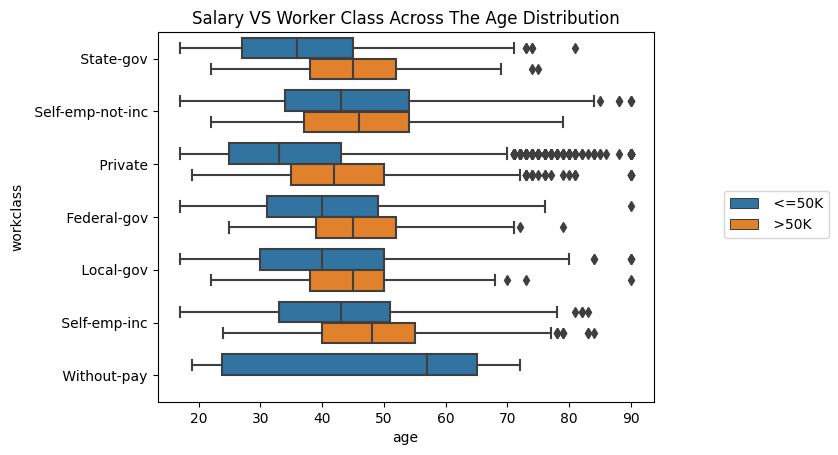

In [29]:
#Checking age distribution
sns.boxplot(df, x = 'age', y = 'workclass', hue = 'salary')
#remove legend that appears in the plot
plt.legend().remove()
# Place the legend outside of the image
plt.figlegend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Salary VS Worker Class Across The Age Distribution')

# Show the plot
plt.show()

From our data we can see that people who were in self-emp-not-inc, private, state-gov and self-emp-inc mostly earned above 50k. Also, people without pay earned below 50k and this spread across all the ages.

#### **OUTLIER DETECTION AND TREATMENT**

In [30]:
df_numeric = df.select_dtypes(exclude = "object") # A variable created to contain our numeric data type

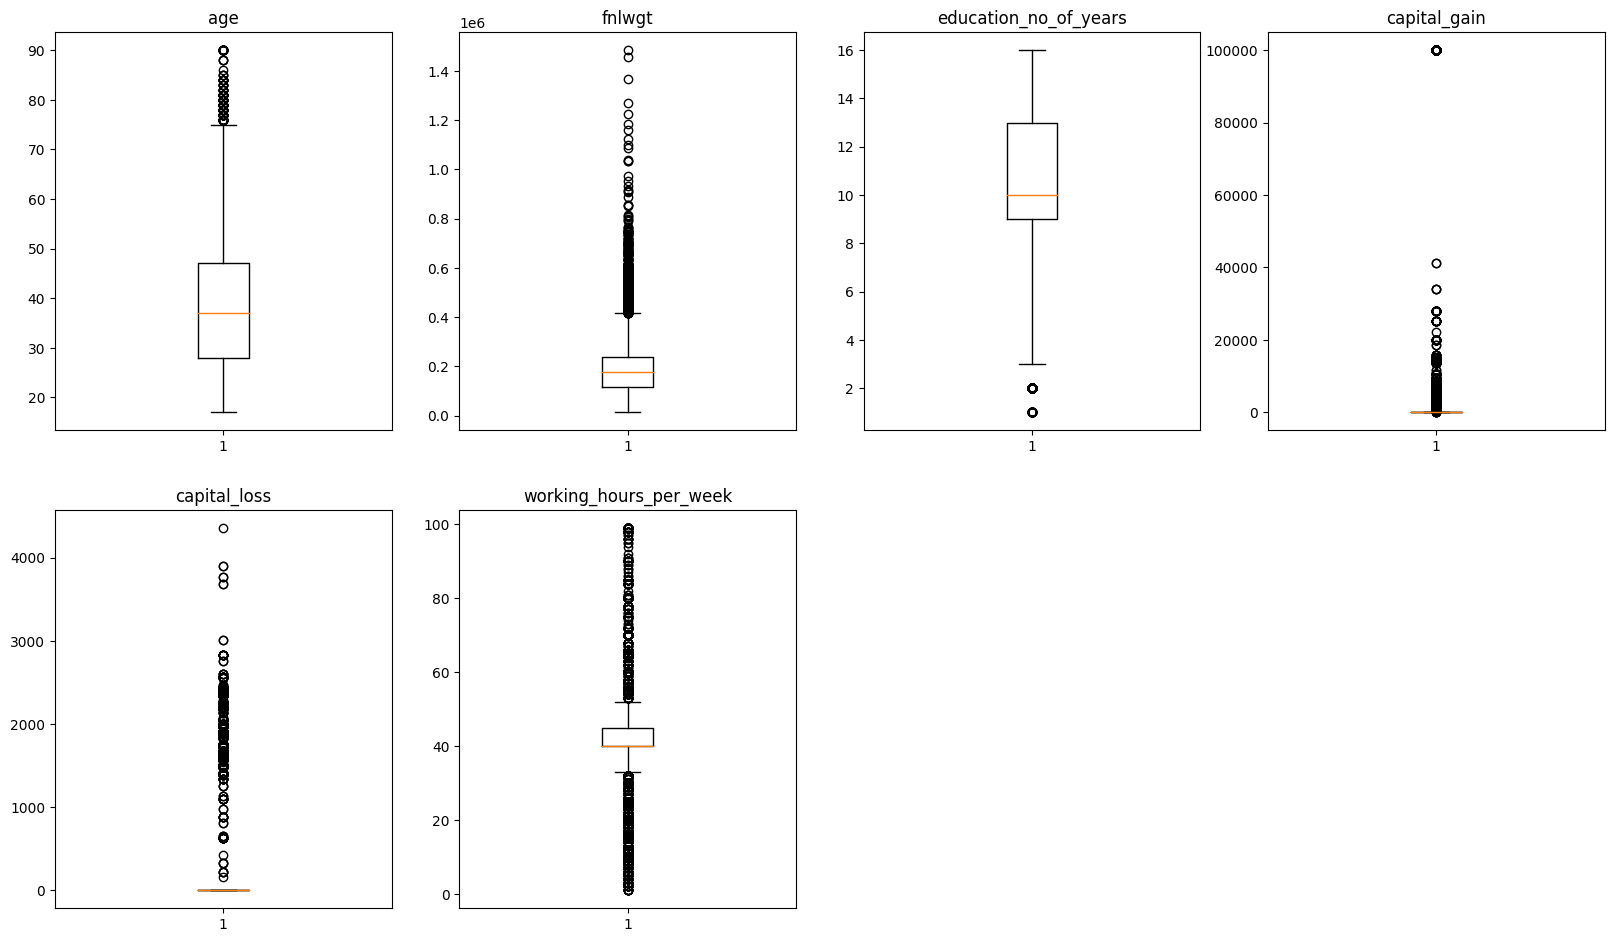

In [31]:
#OUTLIER DETECTION

plt.figure(figsize = (20, 30)) #presetting the size of our plot

for i, var in enumerate(df_numeric): #looping through our numeric data to create their individual plots with the code following below
    plt.subplot(5, 4, i + 1) 
    plt.boxplot(df[var])
    plt.title(var);

In [32]:
#A function that helps to adjust all our outliers to the the upper and lower quatile
def outlier_treatment(df, col):
    Q1 = df[col].quantile(0.25) #lower quantile
    Q3 = df[col].quantile(0.75) #Upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    
    return df

#Helps pass all the columns into out outlier treatment 
def all_outliertreatment(df, col_list ):
    for c in col_list:
        df = outlier_treatment(df, c)
        
    return df

In [33]:
#Passing our numeric dataset into the function and saving it back to our dataset
df = all_outliertreatment(df, df_numeric )

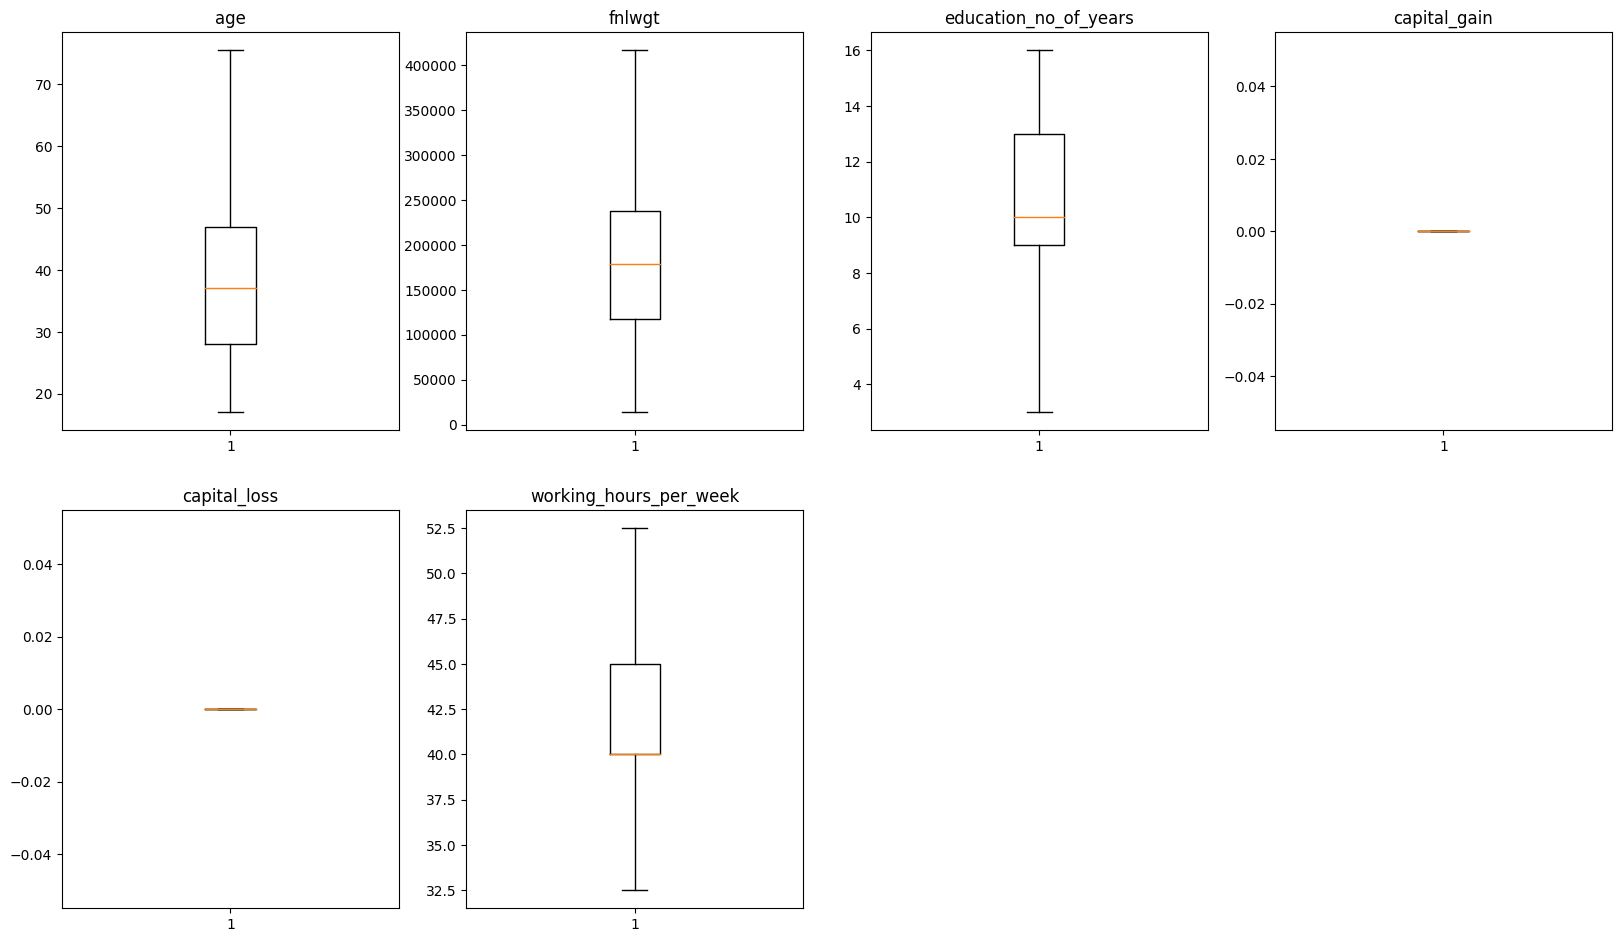

In [34]:
#Confirming Treatment

plt.figure(figsize = (20, 30))

for i, var in enumerate(df_numeric):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var])
    plt.title(var);

### **Selecting Our Features For Our Model**

In [35]:
#Select our features
X = df.drop(columns ='salary', axis = 1)

y = df['salary']

In [36]:
#confirming the rows and columns
y.shape

(30718,)

In [37]:
#confirming the rows and columns
X.shape

(30718, 14)

### **Encoding of Object Datatypes**

In [38]:
#Importing Our Label Encorder Library
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [39]:
#Creating an instance of our LabelEncoder
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in X column.
X['workclass']= label_encoder.fit_transform(X['workclass'])
X['education']= label_encoder.fit_transform(X['education'])
X['marital_status']= label_encoder.fit_transform(X['marital_status'])
X['relationship']= label_encoder.fit_transform(X['relationship'])
X['race']= label_encoder.fit_transform(X['race'])
X['sex']= label_encoder.fit_transform(X['sex'])
X['occupation']= label_encoder.fit_transform(X['occupation'])
X['native_country']= label_encoder.fit_transform(X['native_country'])


In [40]:
# Encode labels in Y column.
y = label_encoder.fit_transform(y)

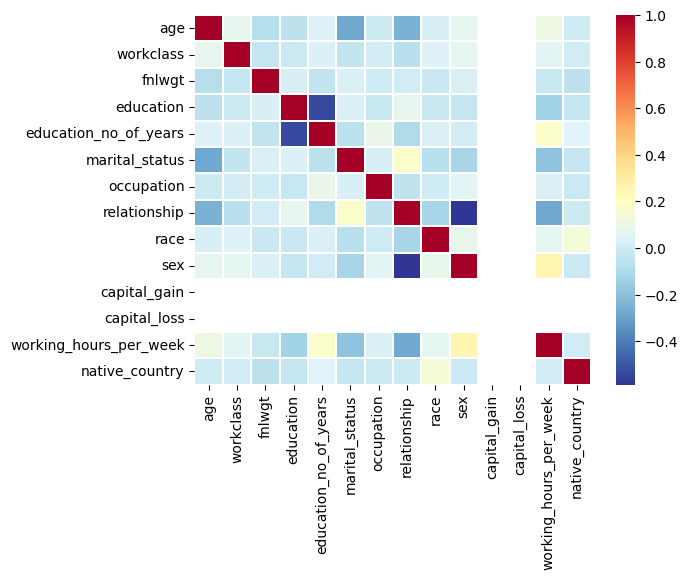

In [41]:
#Visualising the correlation of our encoded numeric data
corr_ = X.corr()

plt.figure()

sns.heatmap(corr_, linewidths=.01, cmap='RdYlBu_r')

plt.show()

We can see from above that there are no strong correlations among the features.

### **Train/test Spliting**

In [42]:
from sklearn.model_selection import train_test_split #importing our spliting library

#Splitting a data to test, train  
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)


In [43]:
#Checking our x_train split size
x_train.shape

(19659, 14)

In [44]:
#Checking our x_test split size
x_test.shape

(6144, 14)

In [45]:
#Checking our x_val split size
x_val.shape

(4915, 14)

### **Scaling The Data**

In [46]:
#importig our scalers
from sklearn.preprocessing import StandardScaler

It is important to scale our data so that the algorithm don't see a large value having more importance than other values that are less.

In [47]:
scaler = StandardScaler() #creating an instance of the scaler

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

### **Model Building**

In [48]:
#Importing our logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [49]:
#Training our model
LogReg_clf = LogisticRegression()

LogReg_clf.fit(x_train_sc, y_train)

LogisticRegression()

In [50]:
#Making predictions with the train test
pred_train = LogReg_clf.predict(x_train_sc)

pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [55]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, pred_train)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train, pred_train)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, pred_train)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train, pred_train)))


Training-set accuracy score: 0.8036
Training-set precision score: 0.6665
Training-set f1 score: 0.5171
Training-set recall score: 0.4225


In [ ]:
#Making prediction on the validation set
pred_val = LogReg_clf.predict(x_val_sc)

pred_val

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Checking the validity scores on the validation set
print('Validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val, pred_val)))
print('Validation-set precision score: {0:0.4f}'. format(precision_score(y_val, pred_val)))
print('Validation-set f1 score: {0:0.4f}'. format(f1_score(y_val, pred_val)))
print('Validation-set recall score: {0:0.4f}'. format(recall_score(y_val, pred_val)))

Validation-set accuracy score: 0.7963
Validation-set precision score: 0.6422
Validation-set f1 score: 0.5037
Validation-set recall score: 0.4144


We can see from our scores we can deduce the following.
**Accuracy:** That for all the values present our model predicted 80% correctly on the training set and 79% correctly on the validation set.
**Recall:** That for all the positive values in the data set the model was able to correctly predict 42% on the training and 41% on the validation
**Precision:** That for all the negative values of our target, the model was able to correctly predict 66% on the training set and 64% on the validation set.
**F1:** This is the shows that the weighted mean of our recall and precision is between 51% on the training set and 50% on the validation set. This looks like a fairly good model but it needs improvement.


In [ ]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf